In [10]:
using Plots, CSV, DataFrames, LsqFit, LaTeXStrings

In [11]:
df1 = CSV.read("Table1.csv", DataFrame)
df2 = CSV.read("Table2.csv", DataFrame)
df3 = CSV.read("Table3.csv", DataFrame)
df4 = CSV.read("Table4.csv", DataFrame)
df5 = CSV.read("Table5.csv", DataFrame);

Line Regulation

Graph 1

In [12]:
Iz = df1[!, 3]
Is = df1[!, 2]

31-element Vector{Float64}:
 0.0
 0.0
 0.12
 0.23
 0.35
 0.46
 0.12
 0.23
 0.58
 0.69
 ⋮
 2.11
 2.3
 2.5
 2.74
 3.01
 3.24
 3.41
 3.67
 3.89

In [26]:
ind

10-element Vector{Int64}:
 21
 23
 24
 25
 26
 27
 28
 29
 30
 31

In [32]:
f = curve_fit((x, p) -> p[1]*x .+ p[2], Iz[23:end], Is[23:end], [1.0, 0.0])
errors = estimate_errors(f, 0.95)

2-element Vector{Float64}:
 0.03560667960771718
 0.04109791727031088

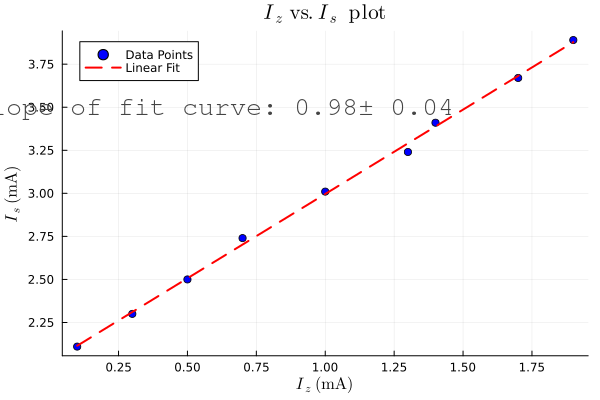

In [35]:
scatter(Iz[23:end], Is[23:end], label="Data Points", xlabel=L"I_z \ \mathrm{(mA)}", ylabel=L"I_s  \ \mathrm{(mA)}", title=L"I_z \ \mathrm{vs.}  I_s \ \ \mathrm{plot}", lw=2, color="blue", legend=:topleft, grid=:on)
plot!(Iz[23:end], f.param[1].*Iz[23:end] .+ f.param[2], label="Linear Fit", lw=2, color="red", linestyle=:dash)
annotate!(0.6, 3.5, "Slope of fit curve: $(round(f.param[1],digits=3))± $(round(errors[1], digits=2))", :color)

In [36]:
savefig("Zener_line_Is_vs_Iz.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_line_Is_vs_Iz.svg"

In [13]:
df1[!,3][22]=0.05

0.05

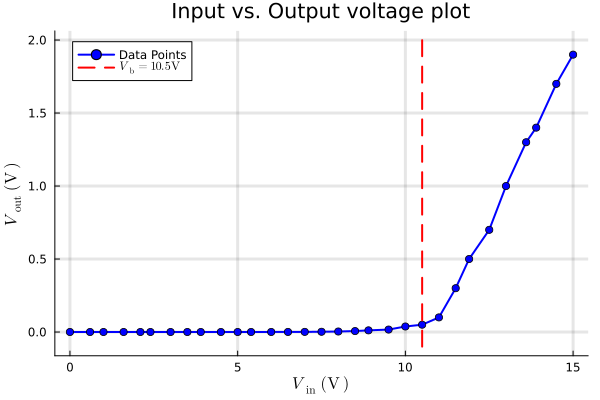

In [22]:
plot()
x=df1[:,1]
y = df1[:,3]
plot!(x,y, marker=:circle, label="Data Points", xlabel=L"V_{\mathrm{in}} \ \mathrm{(V)}", ylabel=L"V_{\mathrm{out}} \ \mathrm{(V)}", title="Input vs. Output voltage plot", lw=2, color="blue", legend=:topleft, grid=:on)
plot!([10.5,10.5], [-0.1,2], label=L"V_\mathrm{b} = 10.5 \mathrm{V}", lw=2, color="red", linestyle=:dash)
plot!(gridwidth=3)

In [23]:
savefig("Zener_line_V0_vs_Vin.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_line_V0_vs_Vin.svg"

Load Regulation

Without Rc

With Rc

In [120]:
Iz = df3[!, 4]
Il = df3[!, 3];

In [121]:
f = curve_fit((x, p) -> p[1]*x .+ p[2], Il, Iz, [1.0, 0.0])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([-0.9802797680001389, 4.025679290351443], [0.03148754691104938, -0.02949846468894357, -0.050681678608935465, -0.061470487888929615, 0.03754350051107758, 0.07596588195108844, 0.03478266803109631, -0.05580893892889893, 0.03300784715110949, 0.012021835551116133, 0.030641419311126183, 0.029655407711132842, -0.03093619924886326, -0.04152780620885865, -0.04231661548885324, -0.0034998294088448567, 0.08590856363115895, -0.05527465028883283], [2.8300000000197216 0.9999999999855337; 2.7800000000112104 0.9999999999855337; … ; 2.0399999999879137 0.9999999999855337; 1.9799999999850335 0.9999999999855337], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

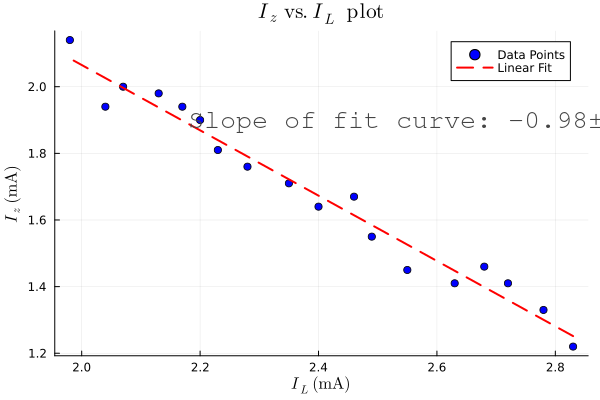

In [122]:
scatter(Il, Iz, marker=:circle, label="Data Points", xlabel=L"I_L \ \mathrm{(mA)}", ylabel=L"I_z  \ \mathrm{(mA)}", title=L"I_z \ \mathrm{vs.}  I_L \ \ \mathrm{plot}", lw=2, color="blue", legend=:topright, grid=:on)
plot!(Il, f.param[1].*Il .+ f.param[2], label="Linear Fit", lw=2, color="red", linestyle=:dash)
errors = estimate_errors(f, 0.95)
annotate!(2.6, 1.9, "Slope of fit curve: $(round(f.param[1],digits=3))± $(round(errors[1], digits=2))", :color)

In [123]:
savefig("Zener_load_Iz_vs_Il.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_load_Iz_vs_Il.svg"

IC Line Regulation

In [124]:
Vin = df4[!, 2]
Vo = df4[!, 4];

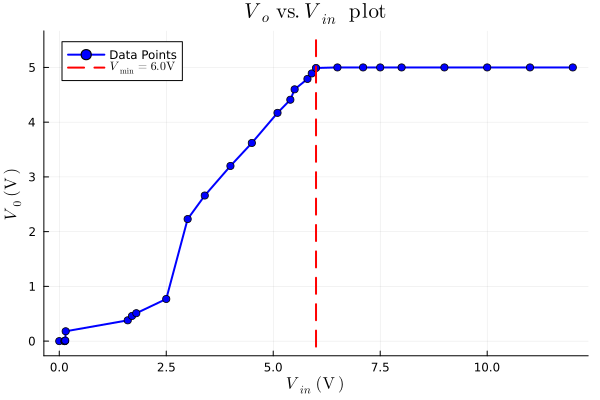

In [125]:
plot(Vin, Vo, marker=:circle, label="Data Points", xlabel=L"V_{in} \ \mathrm{(V)}", ylabel=L"V_0  \ \mathrm{(V)}", title=L"V_o \ \mathrm{vs.}  V_{in} \ \ \mathrm{plot}", lw=2, color="blue", legend=:topleft, grid=:on)
plot!([6.0, 6.0], [-0.1,5.5], label=L"V_{\mathrm{min}} = 6.0 \mathrm{V}", lw=2, color="red", linestyle=:dash)

In [127]:
savefig("IC_line_Vo_vs_Vin.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/IC_line_Vo_vs_Vin.svg"